# Problem Statement

We are tasked with analyzing a comprehensive dataset containing information on Fortune 1000 companies. 
The dataset includes various attributes such as company rankings, financial metrics, executive leadership details, and industry-specific data. 
Our goal is to prepare, clean, and preprocess the raw data effectively, addressing issues like missing values and outliers. 
Additionally, we aim to engineer new features to improve the quality of the dataset for predictive modeling. Subsequently, we plan to build both linear regression and logistic regression models to gain insights into the factors influencing a company's revenue and profitability, respectively. Furthermore, we want to explore the relationships between key variables, such as profitability, CEO-founder dynamics, and their impact on rankings within the Fortune 500. 
This comprehensive analysis will provide valuable insights for strategic decision-making and understanding the dynamics of leading companies in the Fortune 500 list.

# Dataset Description

1. Rank: The rank of the company in the Fortune 500 list.
2. Company: The name of the company.
3. Ticker: The stock ticker symbol of the company (if available).
4. Sector: The sector to which the company belongs.
5. Industry: The specific industry category of the company.
6. Profitable: Indicates whether the company is profitable ("yes" or "no").
7. Founder_is_CEO: Indicates whether the company's founder is also the CEO ("yes" or "no").
8. Female CEO: Indicates whether the company has a female CEO ("yes" or "no").
9. Growth_in_Jobs: Information about growth in jobs at the company.
10. Change_in_Rank: Change in the company's rank compared to the previous year.
11. Gained_in_Rank: Indicates if the company gained in rank compared to the previous year ("yes" or "no").
12. Dropped_in_Rank: Indicates if the company dropped in rank compared to the previous year ("yes" or "no").
13. Newcomer_to_the_Fortune 500: Indicates if the company is a newcomer to the Fortune 500 list ("yes" or "no").
14. Global500: Indicates whether the company is also in the Global 500 list ("yes" or "no").
15. Best Companies: Information about the company being one of the best companies.
16. Number_of_employees: The number of employees at the company.
17. MarketCap_March31_M: Market capitalization of the company as of March 31st.
18. Revenues_M: Revenues of the company.
19. RevenuePercentChange: Percentage change in revenue.
20. Profits_M: Profits of the company.
21. ProfitsPercentChange: Percentage change in profits.
22. Assets_M: Total assets of the company.
23. CEO: The name of the CEO of the company.
24. Country: The country where the company is headquartered.
25. HeadquartersCity: The city where the company's headquarters is located.
26. HeadquartersState: The state where the company's headquarters is located.
27. Website: The company's website URL.
28. Company Type: The type of company (e.g., public, private).
29. Footnote: Additional information or notes (if available).
30. MarketCap_Updated_M: Updated market capitalization of the company. Updated: Date of data update.

31. Updated: date of data update

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fortune1000.csv")

In [5]:
#Same for rows too
pd.set_option('display.max_columns',None) #For showing all the columns when there are more columns. If you set a number, you will be able to see only those many columns instead of 'None'
df.head()

,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,Gained_in_Rank,Dropped_in_Rank,Newcomer_to_the_Fortune500,Global500,Best_Companies,Number_of_employees,MarketCap_March31_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated
0,1,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,no,no,no,yes,no,2100000,397475.0,611289,6.7,11680,-14.6,243197,C. Douglas McMillon,U.S.,Bentonville,AR,www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",416986.0,2023-08-02
1,2,Amazon,AMZN,Retailing,Internet Services and Retailing,no,no,no,no,0.0,no,no,no,yes,no,1541000,1058440.0,513983,9.4,-2722,-108.2,462675,Andrew R. Jassy,U.S.,Seattle,WA,www.amazon.com,Public,"Market value as of July 17, 2023.",1370373.0,2023-08-02
2,3,Exxon Mobil,XOM,Energy,Petroleum Refining,yes,no,no,no,3.0,yes,no,no,yes,no,62000,446424.0,413680,44.8,55740,141.9,369067,Darren W. Woods,U.S.,Irving,TX,www.exxonmobil.com,Public,Excise taxes have been deducted. Market value ...,409878.0,2023-08-02
3,4,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,yes,-1.0,no,yes,no,yes,no,164000,2609039.0,394328,7.8,99803,5.4,352755,Timothy D. Cook,U.S.,Cupertino,CA,www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3051211.0,2023-08-02
4,5,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,0.0,no,no,no,yes,no,400000,440854.0,324162,12.7,20120,16.4,245705,Andrew P. Witty,U.S.,Minnetonka,MN,www.unitedhealthgroup.com,Public,"Market value as of July 17, 2023.",450694.0,2023-08-02


# Data Cleansing


In [6]:
df.isnull().sum()

Rank                            0
Company                         0
Ticker                         41
Sector                          0
Industry                        0
Profitable                      0
Founder_is_CEO                  0
FemaleCEO                       0
Growth_in_Jobs                  7
Change_in_Rank                 71
Gained_in_Rank                 71
Dropped_in_Rank                71
Newcomer_to_the_Fortune500    500
Global500                       0
Best_Companies                  0
Number_of_employees             0
MarketCap_March31_M            41
Revenues_M                      0
RevenuePercentChange            9
Profits_M                       0
ProfitsPercentChange          134
Assets_M                        0
CEO                             1
Country                         0
HeadquartersCity                0
HeadquartersState               0
Website                         0
CompanyType                     0
Footnote                        9
MarketCap_Upda

In [8]:
df=df.drop(['CEO','Company', 'Ticker','Country','HeadquartersCity','HeadquartersState','Website','Footnote','Updated'],axis=1)

In [9]:
df

,Rank,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,Gained_in_Rank,Dropped_in_Rank,Newcomer_to_the_Fortune500,Global500,Best_Companies,Number_of_employees,MarketCap_March31_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,CompanyType,MarketCap_Updated_M
0,1,Retailing,General Merchandisers,yes,no,no,no,0.0,no,no,no,yes,no,2100000,397475.0,611289,6.7,11680,-14.6,243197,Public,416986.0
1,2,Retailing,Internet Services and Retailing,no,no,no,no,0.0,no,no,no,yes,no,1541000,1058440.0,513983,9.4,-2722,-108.2,462675,Public,1370373.0
2,3,Energy,Petroleum Refining,yes,no,no,no,3.0,yes,no,no,yes,no,62000,446424.0,413680,44.8,55740,141.9,369067,Public,409878.0
3,4,Technology,"Computers, Office Equipment",yes,no,no,yes,-1.0,no,yes,no,yes,no,164000,2609039.0,394328,7.8,99803,5.4,352755,Public,3051211.0
4,5,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,0.0,no,no,no,yes,no,400000,440854.0,324162,12.7,20120,16.4,245705,Public,450694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Technology,Information Technology Services,yes,yes,no,yes,-33.0,no,yes,NaN,no,no,69400,1758.0,2444,7.5,103,-26.8,2154,Public,1758.0
996,997,Energy,"Oil and Gas Equipment, Services",yes,no,no,yes,NaN,NaN,NaN,NaN,no,no,3664,2013.0,2426,215.7,92,NaN,2934,Public,2013.0
997,998,Materials,"Building Materials, Glass",yes,no,yes,no,-61.0,no,yes,NaN,no,no,4800,3374.0,2413,0.1,272,78.8,4256,Public,3374.0
998,999,Health Care,Health Care: Pharmacy and Other Services,no,no,no,yes,NaN,NaN,NaN,NaN,no,no,5208,4212.0,2407,18.4,-13660,NaN,4345,Public,4212.0


In [11]:
df.isnull().sum()

Rank                            0
Sector                          0
Industry                        0
Profitable                      0
Founder_is_CEO                  0
FemaleCEO                       0
Growth_in_Jobs                  7
Change_in_Rank                 71
Gained_in_Rank                 71
Dropped_in_Rank                71
Newcomer_to_the_Fortune500    500
Global500                       0
Best_Companies                  0
Number_of_employees             0
MarketCap_March31_M            41
Revenues_M                      0
RevenuePercentChange            9
Profits_M                       0
ProfitsPercentChange          134
Assets_M                        0
CompanyType                     0
MarketCap_Updated_M            35
dtype: int64

In [14]:
df['Newcomer_to_the_Fortune500'].dtype

dtype('O')

In [20]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=df[i].fillna(df[i].mode()[0]) #0 indicates the index as data can have multiple modes thus this code will first mode value in data series
    else:
        df[i]=df[i].fillna(df[i].median())

In [18]:
df['Gained_in_Rank'].mode()[0]

'no'

In [21]:
df.isnull().sum()

Rank                          0
Sector                        0
Industry                      0
Profitable                    0
Founder_is_CEO                0
FemaleCEO                     0
Growth_in_Jobs                0
Change_in_Rank                0
Gained_in_Rank                0
Dropped_in_Rank               0
Newcomer_to_the_Fortune500    0
Global500                     0
Best_Companies                0
Number_of_employees           0
MarketCap_March31_M           0
Revenues_M                    0
RevenuePercentChange          0
Profits_M                     0
ProfitsPercentChange          0
Assets_M                      0
CompanyType                   0
MarketCap_Updated_M           0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        1000 non-null   int64  
 1   Sector                      1000 non-null   object 
 2   Industry                    1000 non-null   object 
 3   Profitable                  1000 non-null   object 
 4   Founder_is_CEO              1000 non-null   object 
 5   FemaleCEO                   1000 non-null   object 
 6   Growth_in_Jobs              1000 non-null   object 
 7   Change_in_Rank              1000 non-null   float64
 8   Gained_in_Rank              1000 non-null   object 
 9   Dropped_in_Rank             1000 non-null   object 
 10  Newcomer_to_the_Fortune500  1000 non-null   object 
 11  Global500                   1000 non-null   object 
 12  Best_Companies              1000 non-null   object 
 13  Number_of_employees         1000 n

In [23]:
df.duplicated().sum()

0

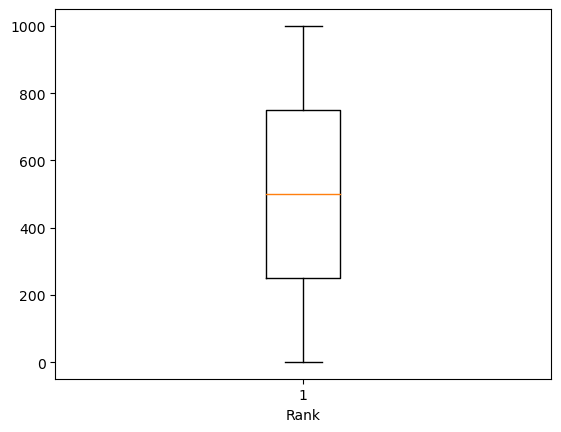

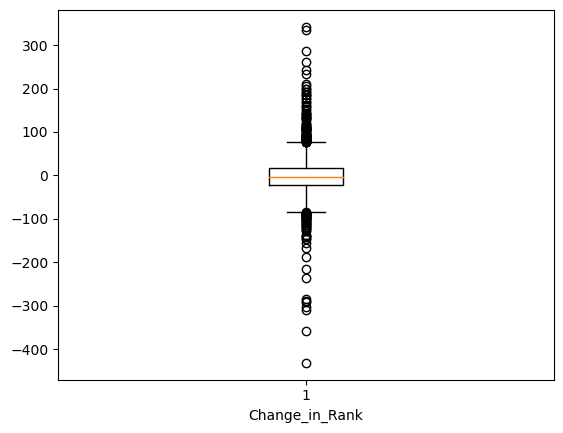

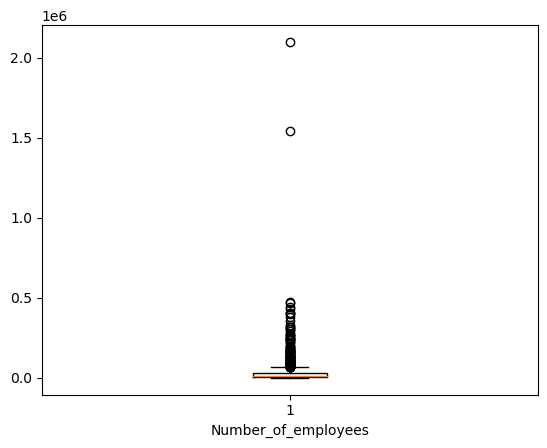

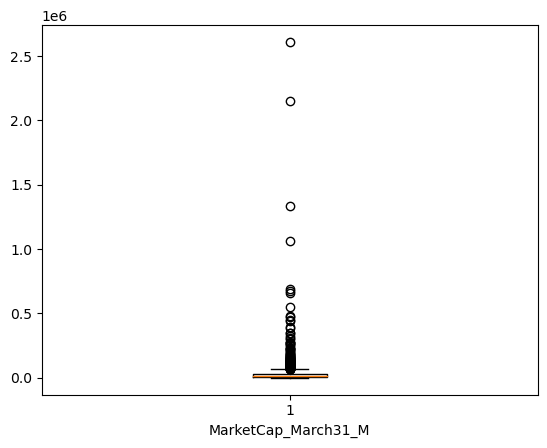

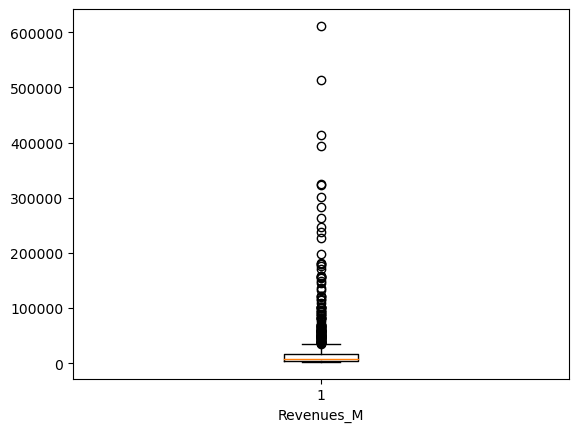

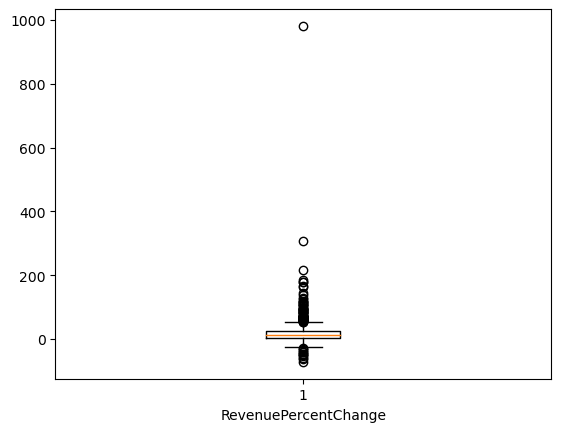

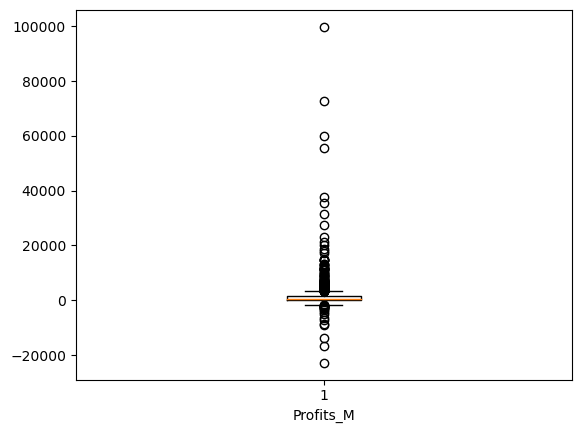

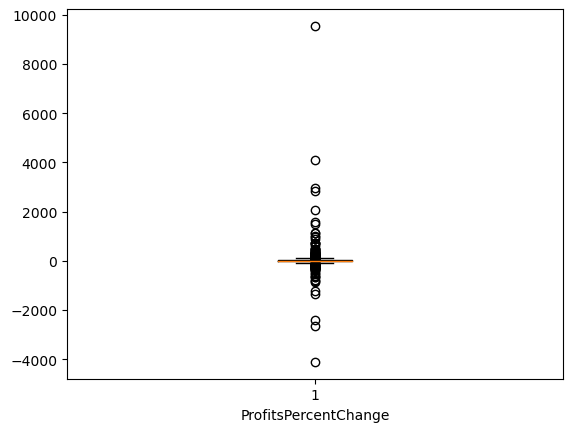

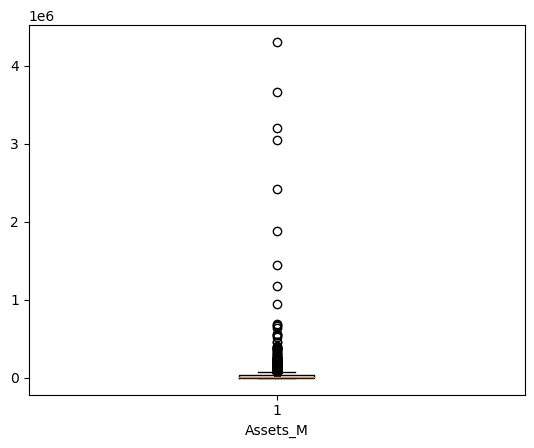

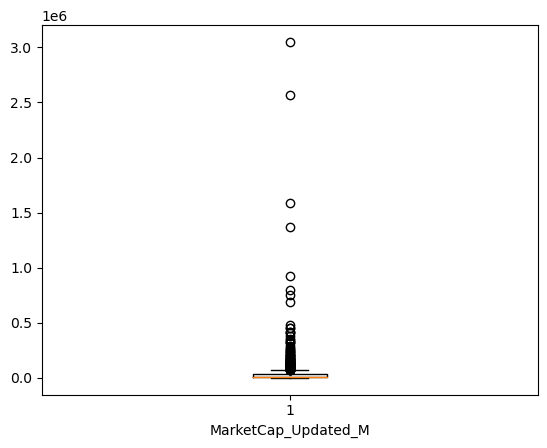

In [25]:
#Outliers
for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [26]:
df.corr()

,Rank,Change_in_Rank,Number_of_employees,MarketCap_March31_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,MarketCap_Updated_M
Rank,1.000000,-0.092440,-0.337421,-0.300905,-0.504490,0.082222,-0.335336,0.033476,-0.262873,-0.280231
Change_in_Rank,-0.092440,1.000000,-0.012133,-0.001146,0.015452,0.459342,0.025336,0.086697,0.001097,-0.000335
Number_of_employees,-0.337421,-0.012133,1.000000,0.363218,0.708092,-0.062839,0.195455,-0.030250,0.172972,0.359336
MarketCap_March31_M,-0.300905,-0.001146,0.363218,1.000000,0.596846,-0.031755,0.797715,-0.013001,0.182038,0.995719
Revenues_M,-0.504490,0.015452,0.708092,0.596846,1.000000,-0.018865,0.546506,-0.004160,0.310603,0.582681
RevenuePercentChange,0.082222,0.459342,-0.062839,-0.031755,-0.018865,1.000000,0.000789,0.070746,-0.014667,-0.027874
Profits_M,-0.335336,0.025336,0.195455,0.797715,0.546506,0.000789,1.000000,0.064560,0.324299,0.781428
ProfitsPercentChange,0.033476,0.086697,-0.030250,-0.013001,-0.004160,0.070746,0.064560,1.000000,-0.025090,-0.012751
Assets_M,-0.262873,0.001097,0.172972,0.182038,0.310603,-0.014667,0.324299,-0.025090,1.000000,0.175393
MarketCap_Updated_M,-0.280231,-0.000335,0.359336,0.995719,0.582681,-0.027874,0.781428,-0.012751,0.175393,1.000000


<Axes: >

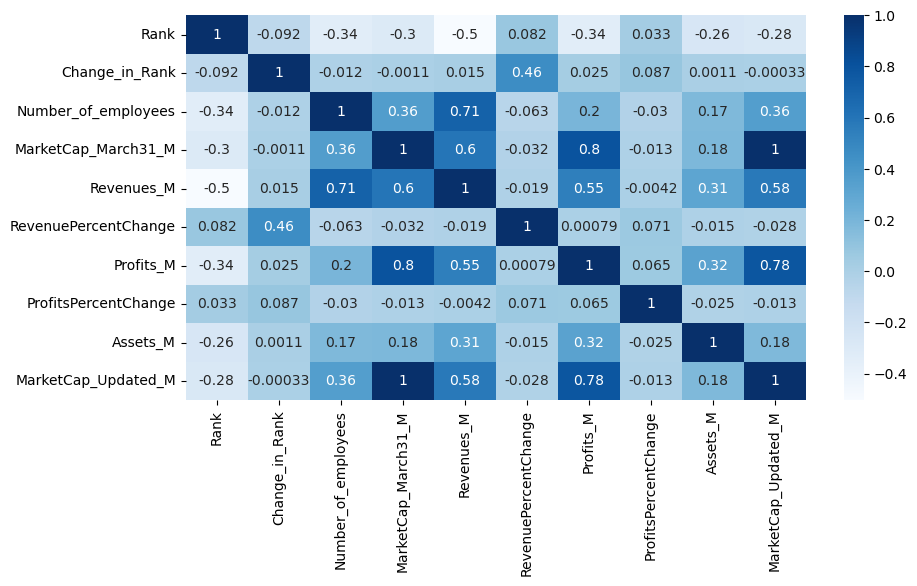

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True , cmap='Blues')

In [31]:
df.columns

Index(['Rank', 'Sector', 'Industry', 'Profitable', 'Founder_is_CEO',
       'FemaleCEO', 'Growth_in_Jobs', 'Change_in_Rank', 'Gained_in_Rank',
       'Dropped_in_Rank', 'Newcomer_to_the_Fortune500', 'Global500',
       'Best_Companies', 'Number_of_employees', 'MarketCap_March31_M',
       'Revenues_M', 'RevenuePercentChange', 'Profits_M',
       'ProfitsPercentChange', 'Assets_M', 'CompanyType',
       'MarketCap_Updated_M'],
      dtype='object')

# Modelling

In [84]:
li = ['Profits_M', 'Revenues_M', 'MarketCap_March31_M','Number_of_employees', 'Assets_M']

In [85]:
x_lin=df[li]
y_lin = df['MarketCap_Updated_M']

In [86]:
x_lin

,Profits_M,Revenues_M,MarketCap_March31_M,Number_of_employees,Assets_M
0,11680,611289,397475.0,2100000,243197
1,-2722,513983,1058440.0,1541000,462675
2,55740,413680,446424.0,62000,369067
3,99803,394328,2609039.0,164000,352755
4,20120,324162,440854.0,400000,245705
...,...,...,...,...,...
995,103,2444,1758.0,69400,2154
996,92,2426,2013.0,3664,2934
997,272,2413,3374.0,4800,4256
998,-13660,2407,4212.0,5208,4345


In [87]:
y_lin

0       416986.0
1      1370373.0
2       409878.0
3      3051211.0
4       450694.0
         ...    
995       1758.0
996       2013.0
997       3374.0
998       4212.0
999       2566.0
Name: MarketCap_Updated_M, Length: 1000, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_lin, y_lin, test_size=0.3, random_state=45)

In [90]:
x_train

,Profits_M,Revenues_M,MarketCap_March31_M,Number_of_employees,Assets_M
640,557,5104,15427.0,26000,16141
357,2096,11570,40520.0,1623,21695
596,77,5692,5404.0,27000,7096
833,401,3375,6405.0,11000,4390
896,708,2972,18251.0,8200,3282
...,...,...,...,...,...
544,757,6393,5295.0,10420,11308
892,83,3009,2100.0,8500,1399
643,878,5064,4480.0,9200,22533
414,-1287,9228,1336.0,30000,11685


In [91]:
y_train

640    15427.0
357    40520.0
596     5404.0
833     6405.0
896    18251.0
        ...   
544     5295.0
892     2100.0
643     4480.0
414     1336.0
971    13877.0
Name: MarketCap_Updated_M, Length: 700, dtype: float64

In [92]:
from sklearn.linear_model import LinearRegression

In [114]:
li_model=LinearRegression()

In [94]:
li_model

LinearRegression()

# Training

In [95]:
li_model.fit(x_train,y_train)

LinearRegression()

In [96]:
#Testing
y_pred=li_model.predict(x_test)

In [97]:
y_pred

array([-1.83954796e+03,  2.47874037e+04,  2.25994415e+04,  1.38933430e+03,
        4.55165499e+03, -2.37992452e+03,  5.02698059e+04,  7.60590029e+03,
        2.70705676e+04, -8.71353543e+02,  2.54810398e+04, -1.94181621e+03,
        5.86703283e+04,  2.47631134e+04,  7.26956055e+03,  1.04912464e+04,
        5.21160869e+04, -2.56561990e+03,  3.46525574e+03,  2.50193275e+03,
        2.76296478e+03,  6.26569238e+03, -8.69837307e+02,  3.72057375e+04,
        2.84544634e+03,  1.23202523e+03,  3.15285794e+03, -1.32653388e+03,
       -3.96330444e+03, -2.68791746e+03,  8.81229176e+03,  1.63698602e+03,
        2.92460966e+04,  2.86384217e+03, -5.55450196e+03,  1.72686835e+03,
        8.26213977e+03,  2.61739185e+03,  4.99656118e+03, -2.68582615e+03,
       -3.36530836e+03,  1.76321486e+04,  6.95876353e+02,  3.08196768e+05,
        4.72926026e+04,  5.20803120e+04,  2.71402497e+04,  1.69432183e+05,
       -6.39184191e+02,  3.95971657e+03,  4.98696288e+05,  1.03738922e+03,
       -3.30570775e+03,  

In [98]:
y_test

726      1960.0
243     23996.0
342     22924.0
976      4661.0
919      7218.0
         ...   
701      3295.0
491      1773.0
48     128992.0
651       616.0
841     41825.0
Name: MarketCap_Updated_M, Length: 300, dtype: float64

In [99]:
from sklearn.metrics import *

In [100]:
#* = all metrics present
r2_score(y_test,y_pred)

0.9946061857447638

In [101]:
# Checking accuracy with training
y_train_pred=li_model.predict(x_train)

In [102]:
y_train_pred

array([ 1.45477102e+04,  4.18112511e+04,  2.98398915e+03,  3.45889183e+03,
        1.72403177e+04,  3.88481915e+04,  6.65680690e+03,  1.11154609e+05,
        5.63091884e+03,  2.78262082e+02, -3.19807080e+03,  1.53619851e+04,
        2.69926966e+04,  4.56506825e+04, -2.81924799e+03,  8.37785293e+02,
        9.53267360e+03,  4.17414864e+03, -1.37270020e+03,  2.28117358e+04,
        1.63918068e+04,  1.57602817e+04,  5.62246844e+03,  1.79583281e+04,
       -1.79938772e+03,  3.02311720e+04,  5.88897406e+03,  7.74667827e+03,
       -2.56222915e+03, -2.59333388e+03, -5.56066702e+02,  8.12997281e+05,
        1.63887477e+04, -2.04799585e+03,  1.76818138e+04,  1.22333640e+04,
        1.20867846e+05,  1.58448906e+05,  1.06559403e+04, -2.39544363e+03,
        5.56953812e+05,  7.74942948e+03,  4.00217243e+05, -1.79524825e+03,
        8.57125154e+03, -3.32730687e+03,  1.06969770e+04,  1.52241869e+03,
        7.83136837e+02, -2.52678413e+03,  3.20178890e+03, -2.29029848e+02,
        2.10287249e+04,  

In [103]:
r2_score(y_train,y_train_pred)

0.9895797362554326

In [104]:
df['MarketCap_March31_M']

0       397475.0
1      1058440.0
2       446424.0
3      2609039.0
4       440854.0
         ...    
995       1758.0
996       2013.0
997       3374.0
998       4212.0
999       2566.0
Name: MarketCap_March31_M, Length: 1000, dtype: float64

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
le=LabelEncoder()

In [107]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [108]:
df

,Rank,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,Gained_in_Rank,Dropped_in_Rank,Newcomer_to_the_Fortune500,Global500,Best_Companies,Number_of_employees,MarketCap_March31_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,CompanyType,MarketCap_Updated_M
0,1,16,25,1,0,0,0,0.0,0,0,0,1,0,2100000,397475.0,611289,6.7,11680,-14.6,243197,1,416986.0
1,2,16,39,0,0,0,0,0.0,0,0,0,1,0,1541000,1058440.0,513983,9.4,-2722,-108.2,462675,1,1370373.0
2,3,4,49,1,0,0,0,3.0,1,0,0,1,0,62000,446424.0,413680,44.8,55740,141.9,369067,1,409878.0
3,4,17,10,1,0,0,1,-1.0,0,1,0,1,0,164000,2609039.0,394328,7.8,99803,5.4,352755,1,3051211.0
4,5,9,26,1,0,0,1,0.0,0,0,0,1,0,400000,440854.0,324162,12.7,20120,16.4,245705,1,450694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,17,34,1,1,0,1,-33.0,0,1,0,0,0,69400,1758.0,2444,7.5,103,-26.8,2154,1,1758.0
996,997,4,47,1,0,0,1,-3.0,0,1,0,0,0,3664,2013.0,2426,215.7,92,1.8,2934,1,2013.0
997,998,13,6,1,0,1,0,-61.0,0,1,0,0,0,4800,3374.0,2413,0.1,272,78.8,4256,1,3374.0
998,999,9,28,0,0,0,1,-3.0,0,1,0,0,0,5208,4212.0,2407,18.4,-13660,1.8,4345,1,4212.0


In [111]:
x_log= df.drop(['Profitable'], axis=1)
y_log=df['Profitable']

In [124]:
y_log

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Profitable, Length: 1000, dtype: int32

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x_log, y_log, test_size=0.3, random_state=45)

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
log_model=LogisticRegression()

In [129]:
log_model

LogisticRegression()

In [130]:
log_model.fit(x_train, y_train)

C:\Users\Jasmine Ansari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
log_pred=log_model.predict(x_test)

In [132]:
y_test

726    1
243    1
342    1
976    1
919    1
      ..
701    1
491    1
48     1
651    0
841    1
Name: Profitable, Length: 300, dtype: int32

In [133]:
log_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [134]:
accuracy_score(y_test,log_pred)

0.99

In [135]:
confusion_matrix(y_test,log_pred)

array([[ 39,   2],
       [  1, 258]], dtype=int64)

In [136]:
pred=log_model.predict(x_train)

In [138]:
accuracy_score(y_train,pred)

1.0